#  SHAP

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model.

https://shap.readthedocs.io/en/latest/index.html

## A classic housing price dataset
- MedInc - median income in block group
- HouseAge - median house age in block group
- AveRooms - average number of rooms per household
- AveBedrms - average number of bedrooms per household
- Population - block group population
- AveOccup - average number of household members
- Latitude - block group latitude
- Longitude - block group longitude

In [5]:
import pandas as pd
import shap
import sklearn


X,y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution
#shap_values = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

Model coefficients:

MedInc = 0.45769
HouseAge = 0.01153
AveRooms = -0.12529
AveBedrms = 1.04053
Population = 5e-05
AveOccup = -0.29795
Latitude = -0.41204
Longitude = -0.40125


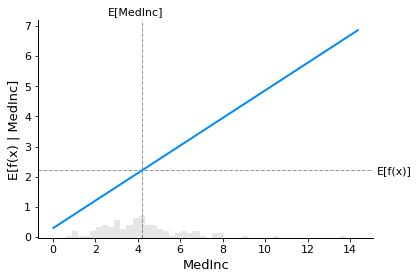

In [7]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))
    
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)    

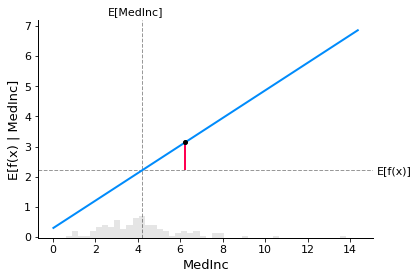

In [14]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

In [12]:
shap.plots.scatter(shap_values[:,"MedInc"])

TypeError: list indices must be integers or slices, not tuple

In [10]:
shap_values = []
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

IndexError: list index out of range